## 15장. 텍스트마이닝

- pip install konlpy
- http://jdk.java.net/  jdk14 다운받기


## 3절. koNLPy 한글 자연어 처리
### 3.1. 자연어 처리 
- 형태소 분석- > 구문 분석 -> 의미 분석 

### 3.6. 품사 태깅
#### Hannanum
analyze(phrase)
Phrase analyzer.

This analyzer returns various morphological candidates for each token. It consists of two parts: 1) Dictionary search (chart), 2) Unclassified term segmentation.

morphs(phrase)
Parse phrase to morphemes.

nouns(phrase)
Noun extractor.

pos(phrase, ntags=9, flatten=True)
POS tagger.

This tagger is HMM based, and calculates the probability of tags.

매개 변수:	
ntags – The number of tags. It can be either 9 or 22.
flatten – If False, preserves eojeols.

In [2]:
text = u"""아름답지만 다소 복잡하기도한 한국어는 전세계에서 13번째로 많이 사용되는 언어입니다"""

In [3]:
text

'아름답지만 다소 복잡하기도한 한국어는 전세계에서 13번째로 많이 사용되는 언어입니다'

In [ ]:
from konlpy.tag import Hannanum
han= Hannanum()

In [ ]:
print(han.analyze(text))

In [ ]:
print(han.morphs(text))

In [ ]:
print(han.nouns(text))

In [ ]:
print(han.pos(text)) # ntags = 9이 기본  태그 수(형태소)를 9개로 분류

In [ ]:
print(han.pos(text,ntags=22))

In [ ]:
print(han.pos(text,ntags=22, flatten = False))
# ntags = 9이 기본  태그 수(형태소)를 9개로 분류
# flatten 이 False이면 어절을 보존함. 

#### 2) kkma

매개 변수:	jvmpath – The path of the JVM passed to init_jvm().
morphs(phrase)
Parse phrase to morphemes.

nouns(phrase)
Noun extractor.

pos(phrase, flatten=True)
POS tagger.

매개 변수:	flatten – If False, preserves eojeols.
sentences(phrase)
Sentence detection.

In [1]:
from konlpy.tag import Kkma
kkma = Kkma()

In [1]:
text

NameError: name 'text' is not defined

In [4]:
print(kkma.morphs(text))

['아름답', '지만', '다소', '복잡', '하', '기', '도', '한', '한국어', '는', '전세계', '에서', '13', '번째', '로', '많이', '사용', '되', '는', '언어', '이', 'ㅂ니다']


In [5]:
print(kkma.nouns(text))

['복잡', '한국어', '전세계', '13', '13번째', '번째', '사용', '언어']


In [ ]:
print(kkma.pos(text))

#### 3) Komoran 

매개 변수:	
jvmpath – The path of the JVM passed to init_jvm().
dicpath – The path of dictionary files. The KOMORAN system dictionary is loaded by default.
morphs(phrase)
Parse phrase to morphemes.

nouns(phrase)
Noun extractor.

pos(phrase, flatten=True)
POS tagger.

매개 변수:	flatten – If False, preserves eojeols.

In [ ]:
from konlpy.tag import Komoran
kom = Komoran()

In [ ]:
print(kom.morphs(text))

In [ ]:
print(kom.nouns(text))

In [ ]:
print(kom.pos(text))

### 3.7. 말뭉치

- konlpy 를 설치하면 아래의 말뭉치를 사용할 수있음. 

In [ ]:
from konlpy.corpus import kolaw
c = kolaw.open('constitution.txt').read()
c[:100]

In [ ]:
from konlpy.corpus import kobill
d = kobill.open('1809890.txt').read()
print(d[150:300])

## 4절. 워드 클라우드
- pip install wordcloud

### 4.1. 말뭉치 샘플을 이용한 워드클라우드 그리기

In [1]:
from konlpy.corpus import kolaw
data = kolaw.open("constitution.txt").read()
from konlpy.tag import Komoran
komoran = Komoran()

In [2]:
print(komoran.nouns("%r"%data[0:1000]))

# \n등이 있으므로 명사만 추출핟록 %r 함. 

['대한민국', '헌법', '유구', '한', '역사', '전통', '국민', '운동', '건립', '대한민국', '임시', '정부', '법통', '불의', '항거', '민주', '이념', '계승', '조국', '민주개혁', '평화', '통일', '사명', '입각', '정의', '인도', '동포애', '민족', '단결', '사회', '폐습', '불의', '타파', '자율', '조화', '바탕', '자유', '민주', '기본', '질서', '정치', '경제', '사회', '문화', '영역', '각인', '기회', '능력', '최고', '도로', '발휘', '자유', '권리', '책임', '의무', '완수', '안', '국민', '생활', '균등', '향상', '밖', '항구', '세계', '평화', '인류', '공영', '이바지', '우리들의', '자손', '안전', '자유', '행복', '확보', '것', '다짐', '년', '7월 12일', '제정', '차', '개정', '헌법', '국회', '의결', '국민', '투표', '개정', '장', '강', '대한민국', '민주공화국', '대한민국', '주권', '국민', '권력', '국민', '대한민국', '국민', '요건', '법률', '국가', '법률', '바', '재외국민', '보호', '의무', '대한민국', '영토', '한반도', '부속', '도서', '대한민국', '통일', '지향', '자유', '민주', '기본', '질서', '입각', '평화', '통일', '정책', '수립', '추진', '대한민국', '국제', '평화', '유지', '노력', '침략', '전쟁', '부인', '국군', '국가', '안전', '보장', '국토방위', '신성', '의무', '수행', '사명', '정치', '중립', '준수', '헌법', '체결', '공포', '조약', '일반', '승인', '국제', '법규', '국내법', '효력', '외국인', '국제법', '조약', '바', '지위', '보장', '공무원', '국민',

In [3]:
word_list = komoran.nouns("%r"%data[0:1000])
text = " ".join(word_list)
text

# : 리스트로 만드는게 아니라 문장으로 만들어줘야함. 그래서 이렇게 만드는 것. 

'대한민국 헌법 유구 한 역사 전통 국민 운동 건립 대한민국 임시 정부 법통 불의 항거 민주 이념 계승 조국 민주개혁 평화 통일 사명 입각 정의 인도 동포애 민족 단결 사회 폐습 불의 타파 자율 조화 바탕 자유 민주 기본 질서 정치 경제 사회 문화 영역 각인 기회 능력 최고 도로 발휘 자유 권리 책임 의무 완수 안 국민 생활 균등 향상 밖 항구 세계 평화 인류 공영 이바지 우리들의 자손 안전 자유 행복 확보 것 다짐 년 7월 12일 제정 차 개정 헌법 국회 의결 국민 투표 개정 장 강 대한민국 민주공화국 대한민국 주권 국민 권력 국민 대한민국 국민 요건 법률 국가 법률 바 재외국민 보호 의무 대한민국 영토 한반도 부속 도서 대한민국 통일 지향 자유 민주 기본 질서 입각 평화 통일 정책 수립 추진 대한민국 국제 평화 유지 노력 침략 전쟁 부인 국군 국가 안전 보장 국토방위 신성 의무 수행 사명 정치 중립 준수 헌법 체결 공포 조약 일반 승인 국제 법규 국내법 효력 외국인 국제법 조약 바 지위 보장 공무원 국민 전체 봉사자 국민 책임 공무원 신분 정치 중립 법률 바 보장 정당 설립 자유 복수 정당'

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

In [5]:
# 워드 크라우드  만들기  
wordc = WordCloud()
wordc.generate(text)

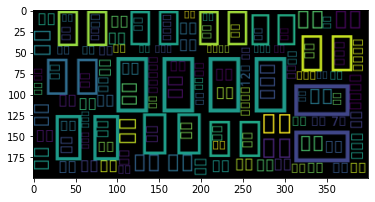

In [6]:
# 워드 클라우드 그리기. 그러나 글씨가 깨져있다.
plt.imshow(wordc, interpolation="bilinear")
plt.show()

### 4.2. 한글 처리

In [7]:
wordc = WordCloud(background_color="black",
                  max_words=20, # 최대 단어는 20개만 써주세요 
                font_path="C:\Windows/Fonts/Malgun.ttf",
                relative_scaling=0.1)
wordc.generate(text)

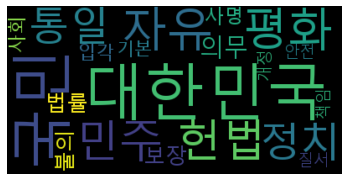

In [8]:
plt.imshow(wordc, interpolation="bilinear")
plt.axis("off") # 워드클라우드의 축 눈금과 레이블을 표시안함
plt.show()

## 4.3. 전체 데이터를 이용한 워드클라우드 생성

In [9]:
word_list = komoran.nouns("%r"%data)
word_list

['대한민국',
 '헌법',
 '유구',
 '한',
 '역사',
 '전통',
 '국민',
 '운동',
 '건립',
 '대한민국',
 '임시',
 '정부',
 '법통',
 '불의',
 '항거',
 '민주',
 '이념',
 '계승',
 '조국',
 '민주개혁',
 '평화',
 '통일',
 '사명',
 '입각',
 '정의',
 '인도',
 '동포애',
 '민족',
 '단결',
 '사회',
 '폐습',
 '불의',
 '타파',
 '자율',
 '조화',
 '바탕',
 '자유',
 '민주',
 '기본',
 '질서',
 '정치',
 '경제',
 '사회',
 '문화',
 '영역',
 '각인',
 '기회',
 '능력',
 '최고',
 '도로',
 '발휘',
 '자유',
 '권리',
 '책임',
 '의무',
 '완수',
 '안',
 '국민',
 '생활',
 '균등',
 '향상',
 '밖',
 '항구',
 '세계',
 '평화',
 '인류',
 '공영',
 '이바지',
 '우리들의',
 '자손',
 '안전',
 '자유',
 '행복',
 '확보',
 '것',
 '다짐',
 '년',
 '7월 12일',
 '제정',
 '차',
 '개정',
 '헌법',
 '국회',
 '의결',
 '국민',
 '투표',
 '개정',
 '장',
 '강',
 '대한민국',
 '민주공화국',
 '대한민국',
 '주권',
 '국민',
 '권력',
 '국민',
 '대한민국',
 '국민',
 '요건',
 '법률',
 '국가',
 '법률',
 '바',
 '재외국민',
 '보호',
 '의무',
 '대한민국',
 '영토',
 '한반도',
 '부속',
 '도서',
 '대한민국',
 '통일',
 '지향',
 '자유',
 '민주',
 '기본',
 '질서',
 '입각',
 '평화',
 '통일',
 '정책',
 '수립',
 '추진',
 '대한민국',
 '국제',
 '평화',
 '유지',
 '노력',
 '침략',
 '전쟁',
 '부인',
 '국군',
 '국가',
 '안전',
 '보장',
 '국토방위',
 '신성',
 '의무',
 '

In [10]:
text = " ".join(word_list)
text

'대한민국 헌법 유구 한 역사 전통 국민 운동 건립 대한민국 임시 정부 법통 불의 항거 민주 이념 계승 조국 민주개혁 평화 통일 사명 입각 정의 인도 동포애 민족 단결 사회 폐습 불의 타파 자율 조화 바탕 자유 민주 기본 질서 정치 경제 사회 문화 영역 각인 기회 능력 최고 도로 발휘 자유 권리 책임 의무 완수 안 국민 생활 균등 향상 밖 항구 세계 평화 인류 공영 이바지 우리들의 자손 안전 자유 행복 확보 것 다짐 년 7월 12일 제정 차 개정 헌법 국회 의결 국민 투표 개정 장 강 대한민국 민주공화국 대한민국 주권 국민 권력 국민 대한민국 국민 요건 법률 국가 법률 바 재외국민 보호 의무 대한민국 영토 한반도 부속 도서 대한민국 통일 지향 자유 민주 기본 질서 입각 평화 통일 정책 수립 추진 대한민국 국제 평화 유지 노력 침략 전쟁 부인 국군 국가 안전 보장 국토방위 신성 의무 수행 사명 정치 중립 준수 헌법 체결 공포 조약 일반 승인 국제 법규 국내법 효력 외국인 국제법 조약 바 지위 보장 공무원 국민 전체 봉사자 국민 책임 공무원 신분 정치 중립 법률 바 보장 정당 설립 자유 복수 정당 보장 정당 목적 조직 활동 민주 국민 정치 의사 형성 참여 필요 조직 정당 법률 바 국가 보호 국가 법률 바 정당 운영 필요 자금 보조 수 정당 목적 활동 민주 기본 질서 위배 때 정부 헌법재판소 해산 제소 수 정당 헌법재판소 심판 해산 국가 전통문화 계승 발전 민족 문화 창달 노력 장 국민의 권리와 의무 국민 인간 존엄 가치 행복 추구 권리 국가 개인 불가침 기본 인권 확인 보장 의무 국민 법 앞 평등 성별 종교 사회 신분 정치 경제 사회 문화 생활 영역 차별 사회 특수 계급 제도 인정 형태 창설 수 훈장 등 영전 자 효력 특권 국민 신체의 자유 법률 체포 구속 압수 수색 심문 법률 적법 절차 처벌 보안처분 강제 노역 국민 고문 형사 진술 강요 체포 구속 압수 수색 때 적법 절차 검사 신청 법관 발부 영장 제시 현행범 인 경우 장기 년 이상 형 해당 죄 도피 증거 인멸

In [11]:
wordcloud = WordCloud(background_color="white",max_words=2000,
                font_path="C:\Windows/Fonts/Malgun.ttf",
                relative_scaling=0.2)
wordcloud.generate(text)

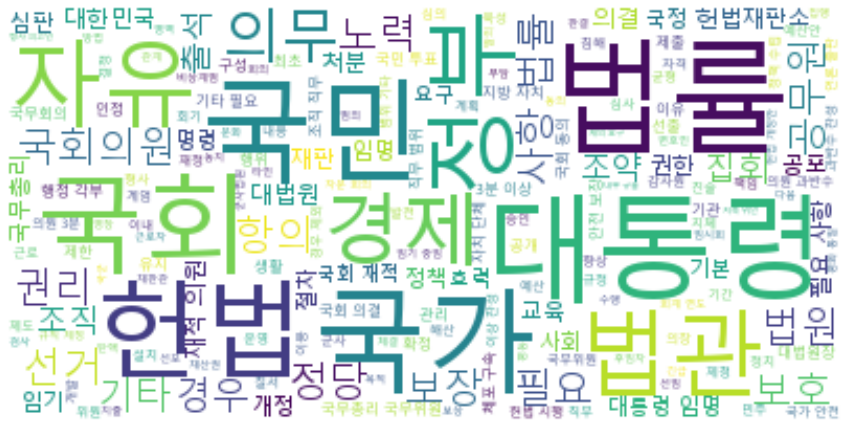

In [12]:
plt.figure(figsize=(15,10))
plt.axis("off")
plt.imshow(wordcloud, interpolation = "bilinear")
plt.show()

### 4.4. 불용어 사전 추가

In [13]:
from wordcloud import STOPWORDS
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
stop_w = STOPWORDS | ENGLISH_STOP_WORDS | set(["대통령","국가"])

C:\Users\82102\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


In [14]:
wordcloud = WordCloud(background_color="white",max_words=2000,
                      stopwords = stop_w,
                      font_path="C:\Windows/Fonts/Malgun.ttf",
                      relative_scaling=0.2)
wordcloud.generate(text)

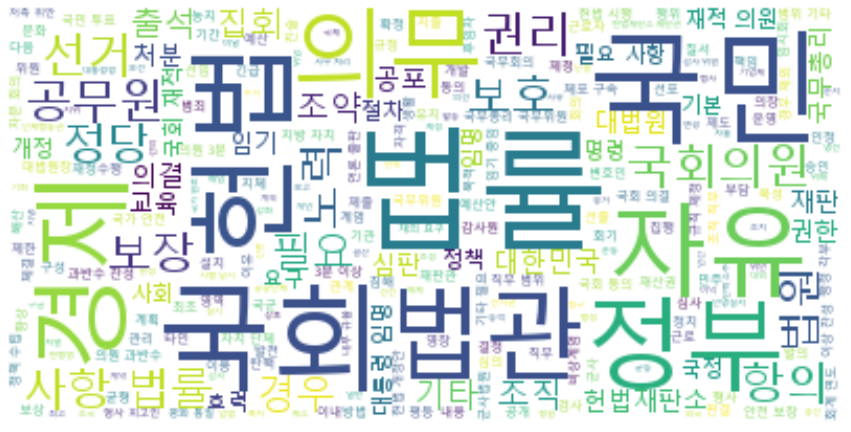

In [15]:
plt.figure(figsize=(15,10))
plt.axis("off")
plt.imshow(wordcloud, interpolation = "bilinear")
plt.show()

### 4.5. 마스킹
- 지정된 마스크이미지에 맞도록 표시함
- 우리나라 지도위에 워드 클라우드 그리기. 

In [16]:
import numpy as np
from PIL import Image
img = Image.open("south_korea_4x.png").convert("RGBA") # 이미지 화소 하나를rgba로읽음 
# rgba 로 불러줄때 바꿔주지 않으면 흑백이 됨. 
mask_ar = np.array(img)

In [17]:
mask_ar.shape  # 점하나가 4개의 채널을 가지고 있음. 

(1124, 720, 4)

In [18]:
wordcloud = WordCloud(background_color="white",max_words=2000,
                      stopwords = stop_w,
                      font_path="C:\Windows/Fonts/Malgun.ttf",
                      mask = mask_ar, random_state =42,
                      relative_scaling=0.2)
wordcloud.generate(text)


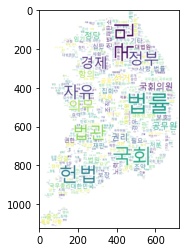

In [19]:
plt.imshow(wordcloud, interpolation = "bilinear")
plt.show()

In [20]:
wordcloud.to_file("result1.png")

### 4.6. 팔레트 변경 

In [21]:
# 팔레트 만드는 함수는 인터넷에 검색하면 많음. 그냥 가져다 쓰면 됨. 
import random
def grey_color(word, font_size, position, orientation,
               random_state=None, # 씨드를 설정하는 것. 
               **kwargs):
    random.seed(random_state)
    return 'hsl(40, 100%%, %d%%)'% random.randint(50,100) 
# 색상 40 채도 100% 밝기 

In [22]:
import numpy as np
from PIL import Image
img = Image.open("south_korea_4x.png").convert("RGBA")
mask_ar = np.array(img)

In [23]:
wordcloud = WordCloud(background_color="black",max_words=2000,
                      stopwords = stop_w,
                      font_path="C:\Windows/Fonts/Malgun.ttf",
                      mask = mask_ar, random_state =42,
                      relative_scaling=0.2)
wordcloud.generate(text)
wordcloud.recolor(color_func = grey_color, random_state =3 )

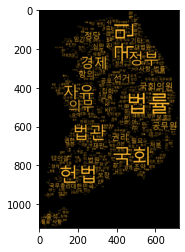

In [24]:
plt.imshow(wordcloud, interpolation = "bilinear")
plt.show()

In [25]:
wordcloud.to_file("result2.png")

### 4.7. 단어 빈도수 계산

In [26]:
import nltk
words = nltk.Text(text)

C:\Users\82102\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82102\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82102\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82102\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82102\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82102\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50896 missing from c

C:\Users\82102\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 44397 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\Users\82102\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 48277 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\Users\82102\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 51032 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\Users\82102\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 51221 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\Users\82102\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 54924 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\Users\82102\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 50896 missing f

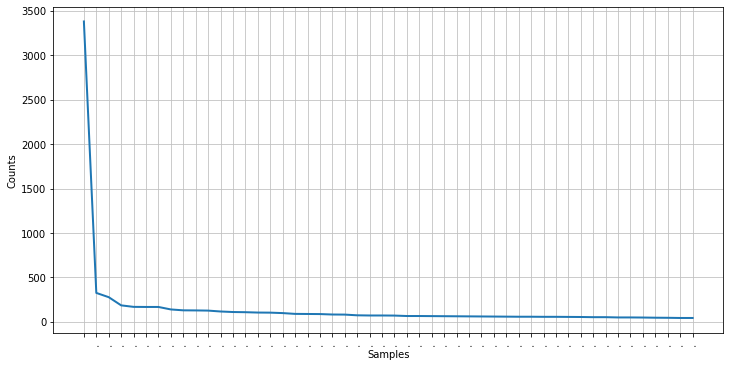

In [27]:
plt.figure(figsize = (12,6))
words.plot(50)  # 50개만
plt.show()

In [28]:
# 위그림을 파일로 저장함 
from matplotlib import pylab
plt.show = lambda : pylab.savefig("word_count.png")

C:\Users\82102\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82102\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82102\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82102\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82102\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82102\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50896 missing from c

C:\Users\82102\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 47749 missing from current font.
  font.load_char(ord(s), flags=flags)


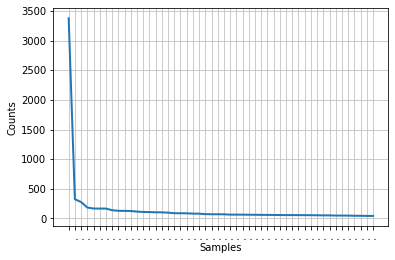

In [29]:
words.plot(50)  # 50개만
plt.show()

## 연합뉴스 예제


In [30]:
import requests 
from bs4 import BeautifulSoup
url = 'https://www.yonhapnewstv.co.kr/category/news/politics/feed/'
response = requests.get(url)
soup = BeautifulSoup(response.content,"xml")
link_list = soup.select('item link')
link_list

[<link>http://www.yonhapnewstv.co.kr/news/MYH20200627007500641</link>,
 <link>http://www.yonhapnewstv.co.kr/news/MYH20200627007300038</link>,
 <link>http://www.yonhapnewstv.co.kr/news/MYH20200627007400038</link>,
 <link>http://www.yonhapnewstv.co.kr/news/MYH20200627007200038</link>,
 <link>http://www.yonhapnewstv.co.kr/news/MYH20200627006300641</link>,
 <link>http://www.yonhapnewstv.co.kr/news/MYH20200627005600038</link>,
 <link>http://www.yonhapnewstv.co.kr/news/MYH20200627005300038</link>,
 <link>http://www.yonhapnewstv.co.kr/news/MYH20200627004900038</link>,
 <link>http://www.yonhapnewstv.co.kr/news/MYH20200627004400038</link>,
 <link>http://www.yonhapnewstv.co.kr/news/MYH20200627004300038</link>]

In [2]:
from konlpy.tag import Kkma
kkma = Kkma()

In [3]:
news = []
for link in link_list:
    news_url = link.text
    news_response = requests.get(news_url)    
    news_soup = BeautifulSoup(news_response.content,"html.parser")
#     print(news_soup)
    news_content = news_soup.select_one(".detail")
#     print(news_content)
    news_n = kkma.nouns(news_content.text)
    news_nouns = filter(lambda word : len(word)>1 , news_n)
    news.append(list(news_nouns))

In [4]:
news

[['법사위',
  '어디',
  '가나',
  '치의',
  '양보',
  '쟁탈전',
  '앵커',
  '본격적',
  '21',
  '21대',
  '국회',
  '구성',
  '협상',
  '여야',
  '물밑',
  '샅바',
  '샅바싸움',
  '싸움',
  '법제',
  '법제사법위원장',
  '사법',
  '위원장',
  '치열',
  '배경',
  '박현우',
  '현우',
  '기자',
  '지난해',
  '법제사법위원',
  '위원',
  '당시',
  '자유',
  '자유한국당',
  '한국',
  '소속',
  '여상규',
  '상규',
  '의원',
  '합의',
  '법안',
  '선언',
  '법사',
  '법사위원장',
  '한국당',
  '자유한국',
  '참여',
  '처리',
  '소위',
  '표결',
  '표결처리',
  '관계',
  '상임위',
  '통과',
  '법률안',
  '본회의',
  '최종',
  '관문',
  '기존',
  '법률',
  '충돌',
  '자구',
  '문제',
  '체계',
  '심사권',
  '행사',
  '심사',
  '수준',
  '본질적',
  '내용',
  '제동',
  '운영',
  '발목',
  '상전',
  '행세',
  '비판',
  '이유',
  '검찰',
  '검찰개혁',
  '개혁',
  '완수',
  '각종',
  '입법',
  '성과',
  '민주당',
  '차단',
  '177',
  '177석',
  '과반',
  '의석',
  '무용지물',
  '김태년',
  '원내',
  '원내대표',
  '대표',
  '법사위원장직',
  '야당',
  '17',
  '17대',
  '이후',
  '이어진',
  '관행',
  '반면',
  '슈퍼',
  '여당',
  '탄생',
  '입장',
  '정부',
  '견제',
  '최후',
  '수단',
  '폐지',
  '단골',
  '과제',
  '권한',
  '축소',
  '무산',
  '정치적',
  '계산',
  '

In [18]:
from itertools import chain
nn=list(chain(*news))

In [19]:
nn[:10]

['법사위', '어디', '가나', '치의', '양보', '쟁탈전', '앵커', '본격적', '21', '21대']

In [5]:
len(news)

10

In [5]:
result = []
for i in range(len(news)):
    result.extend(news[i])

In [6]:
len(set(result))/len(result)

0.6629072681704261

In [7]:
len(set(result))

1058

In [17]:
result= " ".join(result)
result[:5]

'법 사 위'

In [16]:
result[:5]

['법', '사', '위', ' ', '어']

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
from wordcloud import STOPWORDS # 불용어 사전 
import numpy as np

stop_word = set(["연합뉴스","연합","기사문의","문의","앵커","기자","기자문의",
                "뉴스","제보","닫기","기사","보도","라인","오늘","시간"])

from PIL import Image
img = Image.open("south_korea_4x.png").convert("RGBA")
 # 이미지 화소 하나를rgba로읽음  # rgba 로 불러줄때 바꿔주지 않으면 흑백이 됨. 
mask_ar = np.array(img)


In [11]:
result_w = WordCloud(background_color="white",
                  max_words=1000,stopwords = stop_word,
                 font_path="C:\Windows/Fonts/Malgun.ttf", # 한글이 안깨지게 하기위한 처리
                  random_state =42, relative_scaling=0.2, mask = mask_ar)
result_w.generate(result)


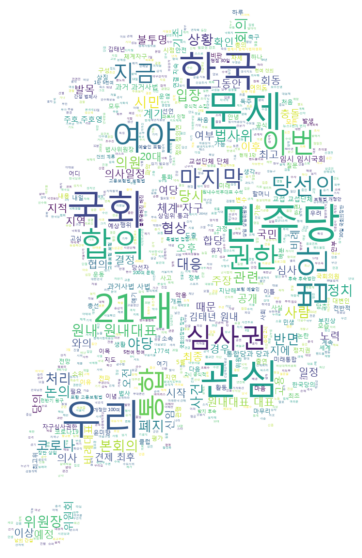

In [12]:
plt.figure(figsize=(15,10))
plt.imshow(result_w, interpolation="bilinear") 
plt.axis("off") # 워드클라우드의 축 눈금과 레이블을 표시안함 
plt.show()


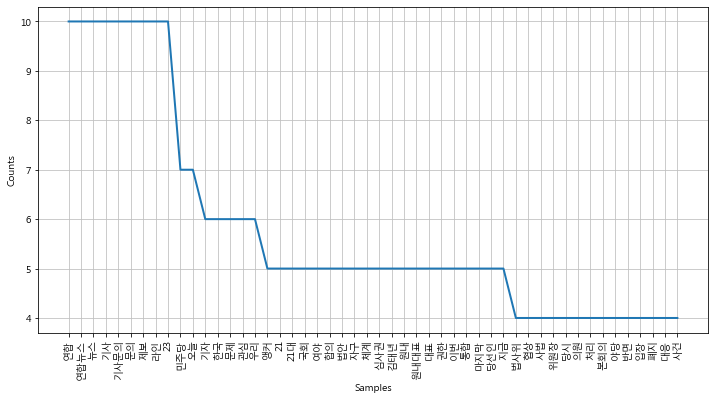

In [20]:
import nltk
result = nltk.Text(nn)
plt.figure(figsize = (12,6))
result.plot(50)
plt.show()

In [14]:

import matplotlib
from matplotlib import font_manager, rc
import platform
try : 
    if platform.system() == 'Windows':
    # 윈도우인 경우
        font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
        rc('font', family=font_name)
except : 
    pass
matplotlib.rcParams['axes.unicode_minus'] = False
